<a href="https://colab.research.google.com/github/lcalderon-aceituno/BVERCam/blob/master/HW14_Advanced_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title Import dependencies 
from sympy import *
from sympy.plotting import plot
from sympy import symbols
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
from sympy import Function,plot_parametric

# 12.17

## part a

In [3]:
gamma = 1.3
w = 2*pi
w0 = 1.5*w
beta = w0/4
init = [0,0] # initial conditions

In [4]:
# r = phi dot
def drdt(t, r):
  phi= r[0]
  phidot = r[1]
  return [phidot, -2*beta*phidot-w0**2*sin(phi)+gamma*w0**2*cos(w*t)]

In [5]:
tspan = [0, 8]

In [6]:
sol = solve_ivp(drdt, tspan, init, dense_output=True, rtol = 1e-12)

In [7]:
t = np.linspace(0, 8, 10000) # grab 10000 time points 
r = sol.sol(t)
phi1 = r[0]

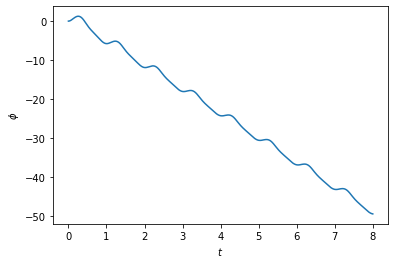

In [8]:
plt.plot(t, phi1);
plt.ylabel('$\phi$');
plt.xlabel('$t$');

The graph above demonstrates that the motion of the DDP is a superposition of linear motion and periodic oscillations. 

## part b

In [9]:
i = 0
newphi = []
for time in t:
  newphi.append(phi1[i] + 2*pi*time)
  i = i + 1

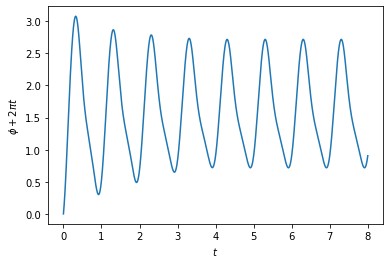

In [10]:
plt.plot(t, newphi);
plt.ylabel('$\phi + 2 \pi t$');
plt.xlabel('$t$');

In the plot above, we have gotten rid of the linear motion and are left with just the periodic part of the DDP's motion.

# 12.18

In [11]:
init2 = [1,0] # second initial conditions

In [12]:
sol2 = solve_ivp(drdt, tspan, init2, dense_output=True, rtol = 1e-12) # secondary solution
r = sol2.sol(t)
phi2 = r[0]

The plot below showes the behavior over time of the same system with the different initial conditions. They can be seen to converge after about $0.3$ seconds.

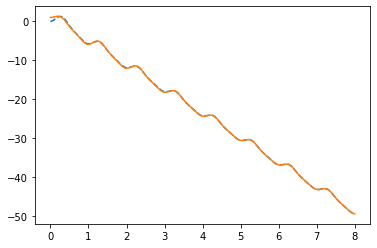

In [13]:
plt.plot(t, phi1,'--', t, phi2);

In [14]:
deltaphi = phi2 - phi1

The graph below shows the difference between trajectories of the DDP for two very different initial conditions, on a logarithmic scale. The plot shows that the trajectories converge (the difference decreases over time).

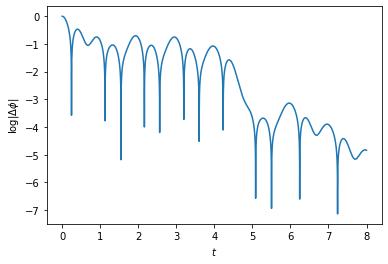

In [15]:
y = np.log10(abs(deltaphi));
plt.plot(t, y);
plt.ylabel('$\log|\Delta\phi|$');
plt.xlabel('$t$');

## 12.20

# part a 

In [16]:
w1 = 2*np.pi
delta = 0
beta = 0.5
A = 1

In [29]:
t = np.linspace(0, 10, 1000) # time from 0 to 10 s

In [30]:
x = []
for time in t:
  x.append(A*exp(-beta*time)*cos(w1*time))
  i = i + 1

In [31]:
xdot = []
for time in t:
  xdot.append(-w1*A*exp(-beta*time)*sin(w1*time-delta) - beta*A*exp(-beta*time)*cos(w1*time -delta))
  i = i + 1

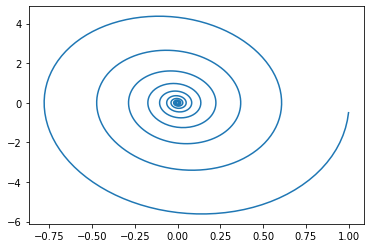

In [32]:
plt.plot(x, xdot);

## part b

The unique stationary attractor of the system is $(0,0)$ as all trajectories can be seen to approach it. In terms of energy conservation, we can interpret this as meaning that the system has decreasing position and velocity (corresponding to a decrease in potential and kinetic energy) over time due to damping. 